In [1]:
#import kaggle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [3]:
test_db = pd.read_csv("test.csv")
train_db = pd.read_csv("train.csv")
test_db

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_db.nunique()
## Survived -> 0 , 1
## Pclass -> 1 , 2 , 3
## Sex -> 'male' , 'female'
## SibSp -> 
## Embarked -> 'S' , 'C' , 'Q' , NaN

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2915545a920>,
 'caps': [<matplotlib.lines.Line2D at 0x2915545aec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2915545a650>],
 'medians': [<matplotlib.lines.Line2D at 0x2915545b460>],
 'fliers': [<matplotlib.lines.Line2D at 0x2915545b730>],
 'means': []}

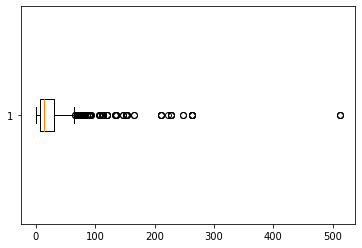

In [5]:
#train_db.SibSp.hist()
plt.plot()
plt.boxplot(train_db.Fare , vert = False)

In [6]:
train_db[train_db.Age.isna() == True]
## 177 records having NaN
train_db[train_db.Cabin.isna() == True]
## 687 records having NaN
train_db[train_db.Embarked.isna() == True]
## 2 records having NaN
train_db[train_db.SibSp.isna() == True]
## 0
train_db[train_db.Parch.isna() == True]
## 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [7]:
num_survived = train_db[train_db.Survived == 1].count()
num_female = train_db[train_db.Sex == 'female'].count()
train_db[train_db.Sex == 'female'][train_db.Survived == 1].count()
train_db

C:\Users\Mrinal Kumar\AppData\Local\Temp\ipykernel_24964\1501597322.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_db[train_db.Sex == 'female'][train_db.Survived == 1].count()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
def clean(data):
    data = data.drop(["Ticket" , "Cabin" , "PassengerId" , "Name"] , axis = 1)

    cols = ["SibSp" , "Parch" , "Fare" , "Age"]
    for col in cols:
        data[col].fillna(data[col].median() , inplace = True)
    
    data.Embarked.fillna("U" , inplace = True)
    return data

train_db = clean(train_db)

In [9]:
train_db.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex" , "Embarked"]

def encode(data):
    for col in cols:
        data[col] = le.fit_transform(data[col])
        print(le.classes_)
        
    return data


train_db = encode(train_db)
train_db

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


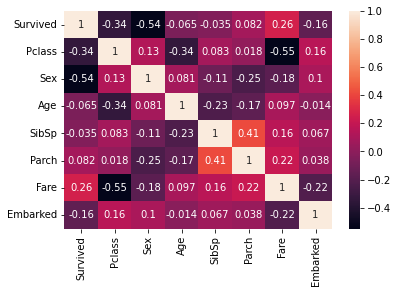

In [11]:
pd_corr = train_db.corr() ## simple corr matrix

import seaborn as sb
sb_corr = sb.heatmap(pd_corr , annot=True)


from heatmap --> 

        Pclass
        Sex
        Fare
        Embarked

In [12]:
train = train_db.drop(["Age" , "SibSp" , "Parch"] , axis = 1)
train

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,1,7.2500,2
1,1,1,0,71.2833,0
2,1,3,0,7.9250,2
3,1,1,0,53.1000,2
4,0,3,1,8.0500,2
...,...,...,...,...,...
886,0,2,1,13.0000,2
887,1,1,0,30.0000,2
888,0,3,0,23.4500,2
889,1,1,1,30.0000,0


Decision Tree

In [13]:
## Decision Tree

from sklearn import tree
Y = train.Survived
X = train.drop(["Survived"] ,axis=1)
clf = tree.DecisionTreeClassifier()
clf.fit(X,Y)

DecisionTreeClassifier()

In [14]:
# tree.plot_tree
# import graphviz
# dot_data = tree.export_graphviz(clf , out_file=None)
# graph = graphviz.Source(dot_data)
# graph.render("Titanic")

In [15]:
test_db = clean(test_db)
test_db = encode(test_db)
test = test_db.drop(["Age" , "SibSp" , "Parch"] , axis = 1)
test 

['female' 'male']
['C' 'Q' 'S']


,Pclass,Sex,Fare,Embarked
0,3,1,7.8292,1
1,3,0,7.0000,2
2,2,1,9.6875,1
3,3,1,8.6625,2
4,3,0,12.2875,2
...,...,...,...,...
413,3,1,8.0500,2
414,1,0,108.9000,0
415,3,1,7.2500,2
416,3,1,8.0500,2


GAUSSIAN NAIVE BAYES

In [16]:
### Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X , Y).predict(X)
print("for train data => %d , %d" % (X.shape[0] , (y_pred != Y).sum()))


### for test data

y_test_gnb = gnb.fit(X,Y).predict(test)
##gnb.predict_proba(test)

for train data => 891 , 202


Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X,Y)
y_pred = lr.predict(X) 
print("for train data => %d , %d" % (X.shape[0] , (y_pred != Y).sum()))

### for test data
y_test_lr = lr.predict(test)

##(y_test_gnb == y_test_lr).sum()
##lr.predict_proba(test)
lr.score(X , Y)

for train data => 891 , 198


0.7777777777777778